Exploratory Data Analysis with Pandas -- https://www.youtube.com/watch?v=xi0vhXFPegw 31:14

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

#
# Pandas does not show every column by default.  
pd.set_option('display.max_columns', 200)

In [5]:
data_frame_1 = pd.read_csv('car-sales.csv')
data_frame_1

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# Step 1: Data Understanding

## Data Understanding

<ul>Dataframe 
    <li>shape</li>
    <li>head</li>
    <li>tail</li>
    <li>types ( which can you switch Date, Categorical)</li>
    <li>describe</li>
</ul>


In [6]:
data_frame_1.shape

(10, 5)

In [7]:
data_frame_1.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [8]:
data_frame_1.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [9]:
data_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [10]:
# Convert the Doors to catagorical since there can a very limitied 
data_frame_1["Doors"] = data_frame_1["Doors"].astype("category")
data_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Make           10 non-null     object  
 1   Colour         10 non-null     object  
 2   Odometer (KM)  10 non-null     int64   
 3   Doors          10 non-null     category
 4   Price          10 non-null     object  
dtypes: category(1), int64(1), object(3)
memory usage: 590.0+ bytes


In [11]:
# Convert the price to float and use the style to add the dollar sign and round
data_frame_1["Price"] = ( data_frame_1["Price"]
                         .str.replace('[\$\,]', '', regex=True)
                         .astype(float)
                        )
data_frame_1.style.format({ 'Price':'${0:,.2f}'})

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [12]:
data_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Make           10 non-null     object  
 1   Colour         10 non-null     object  
 2   Odometer (KM)  10 non-null     int64   
 3   Doors          10 non-null     category
 4   Price          10 non-null     float64 
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 590.0+ bytes


# Second Step -- Data Preparation
<ul>Data Preparation
    <li>Dropping irrelevant columns and rows</li>
    <li>Identifying duplicated columns</li>
    <li>renaming columns</li>
    <li>Feature Creation</li>
</ul>

In [13]:
# Remove the columns
#    1. data_frame_1.columns
#    2. copy the list of columns including the []
#    3. get rid of columns you don't want
#    4. Run the Square again
#    Can use the drop command and can provide an element or a list  df.drop(['Door'], axis=1)
#    .copy -- 

data_frame_2 = data_frame_1[['Make', 'Colour', 'Odometer (KM)', 'Price']].copy()

In [14]:
data_frame_2

,Make,Colour,Odometer (KM),Price
0,Toyota,White,150043,4000.0
1,Honda,Red,87899,5000.0
2,Toyota,Blue,32549,7000.0
3,BMW,Black,11179,22000.0
4,Nissan,White,213095,3500.0
5,Toyota,Green,99213,4500.0
6,Honda,Blue,45698,7500.0
7,Honda,Blue,54738,7000.0
8,Toyota,White,60000,6250.0
9,Nissan,White,31600,9700.0


In [15]:
# pd.to_datetime(df['name of column'])
# pd.to_numeric(df['name of column'])

In [16]:
# Rename columns
data_frame_2 = data_frame_1.rename(columns={ 'Price':'MSRP'})

In [17]:
data_frame_2

,Make,Colour,Odometer (KM),Doors,MSRP
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [18]:
# Identify missing values
data_frame_2.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
MSRP             0
dtype: int64

In [19]:
# Duplicated 
data_frame_2.duplicated()

# See the rows that are duplicated
data_frame_2.loc[ data_frame_2.duplicated() ]

,Make,Colour,Odometer (KM),Doors,MSRP


In [20]:
data_frame_2.duplicated(subset=['MSRP'])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
dtype: bool

In [21]:
# Get the rows that are duplicated
data_frame_2.loc[data_frame_2.duplicated(subset=['MSRP'])]

,Make,Colour,Odometer (KM),Doors,MSRP
7,Honda,Blue,54738,4,7000.0


In [22]:
data_frame_2.query( 'MSRP == 7000' )

,Make,Colour,Odometer (KM),Doors,MSRP
2,Toyota,Blue,32549,3,7000.0
7,Honda,Blue,54738,4,7000.0


In [23]:
# Shows the ones that are not duplicated
~data_frame_2.duplicated(subset=['MSRP'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8     True
9     True
dtype: bool

In [24]:
# Remvoe the rows that are dupliated and the index will jump since we removed rows so reset_index
# drop=True gets rid of the original index
data_frame_3 = data_frame_2.loc[~data_frame_2.duplicated(subset=['MSRP'])].reset_index(drop=True)

In [25]:
data_frame_3

,Make,Colour,Odometer (KM),Doors,MSRP
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Toyota,White,60000,4,6250.0
8,Nissan,White,31600,4,9700.0


# Feature Understanding

In [26]:
data_frame_3['Colour'].value_counts()

White    4
Blue     2
Red      1
Black    1
Green    1
Name: Colour, dtype: int64

In [27]:
data_frame_3['Make'].value_counts()

Toyota    4
Honda     2
Nissan    2
BMW       1
Name: Make, dtype: int64

Text(0, 0.5, 'Count')

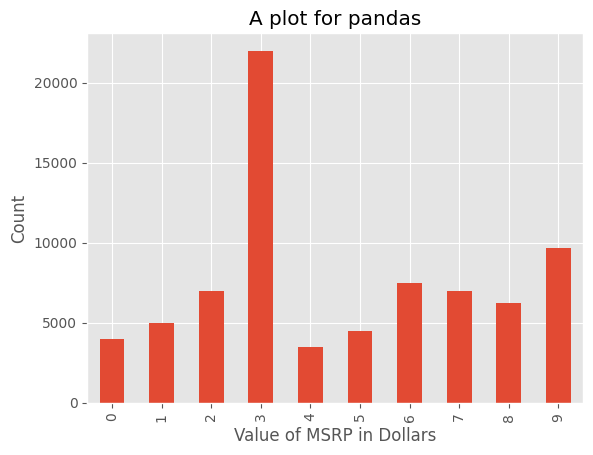

In [28]:
matplotLib_axis = data_frame_2['MSRP'].plot(kind='bar', title="A plot for pandas")
matplotLib_axis.set_xlabel('Value of MSRP in Dollars')
matplotLib_axis.set_ylabel('Count')

Text(0, 0.5, 'Count')

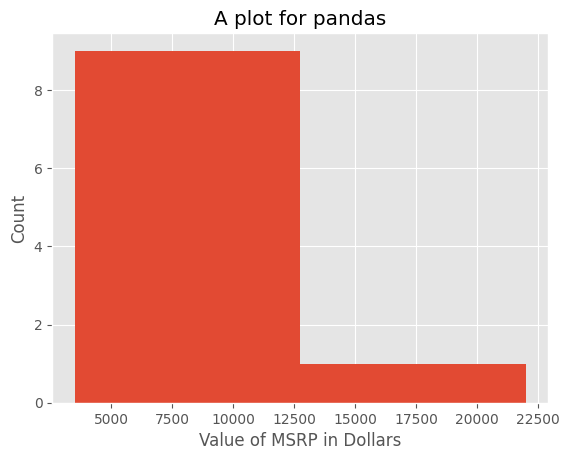

In [29]:
matplotLib_axis = data_frame_2['MSRP'].plot(kind='hist', bins=2, title="A plot for pandas")
matplotLib_axis.set_xlabel('Value of MSRP in Dollars')
matplotLib_axis.set_ylabel('Count')

Text(0, 0.5, 'Count')

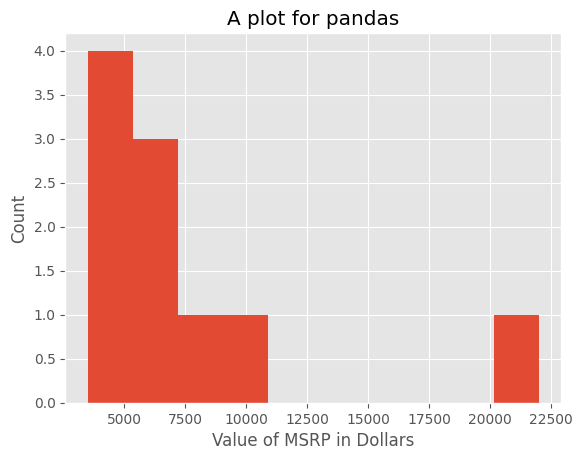

In [30]:
#Intereting : you might want to look at the bin count to see how best to display the data
matplotLib_axis = data_frame_2['MSRP'].plot(kind='hist', title="A plot for pandas")
matplotLib_axis.set_xlabel('Value of MSRP in Dollars')
matplotLib_axis.set_ylabel('Count')

Text(0, 0.5, 'Count')

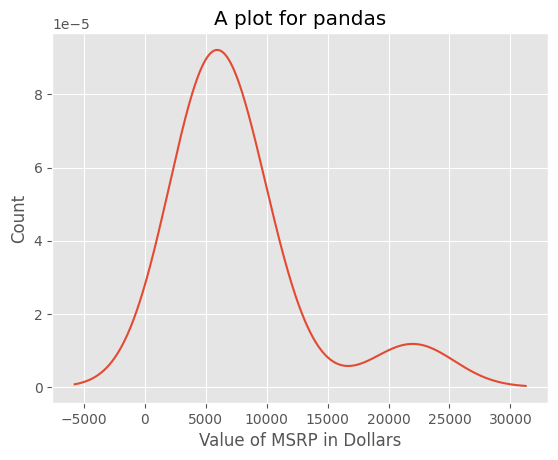

In [31]:
# Kernel Desnity Plot
# A kernel density estimate (KDE) plot is a method for visualizing tthe distribution of observations in a dataset,
# analogous to a histogram.  Uses a continuous probability density curve in one or more dimensions 
matplotLib_axis = data_frame_2['MSRP'].plot(kind='kde', title="A plot for pandas")
matplotLib_axis.set_xlabel('Value of MSRP in Dollars')
matplotLib_axis.set_ylabel('Count')

# Feature Relationships

<ul Feature Relationships>
    <li>Scatterplot -- Compare two features</li>
    <li>Heatmap Generation</li>
    <li>Pairplot</li>
    <li>Group by comparions</li>
</ul>

How do the different features relate to each other



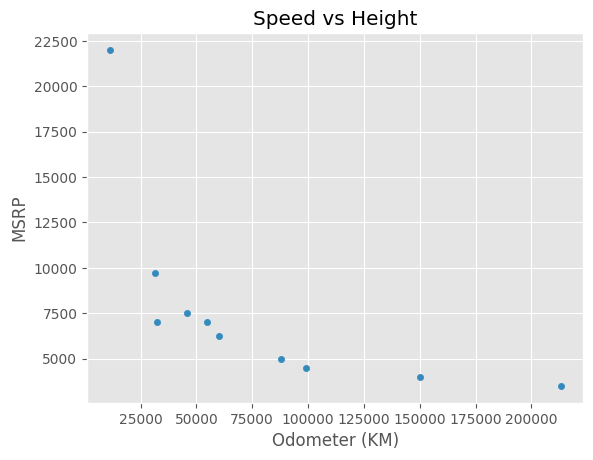

In [32]:
data_frame_2.plot(kind='scatter', x='Odometer (KM)', y='MSRP', title='Speed vs Height' )

# Remove the Object -- Comment it out to see the object
plt.show()

<AxesSubplot:xlabel='Odometer (KM)', ylabel='MSRP'>

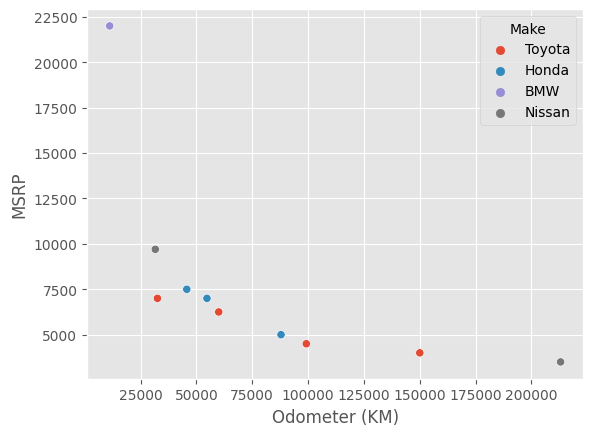

In [33]:
# Hue is the color which Can be different columns that the x or y 
sns.scatterplot(x='Odometer (KM)', y='MSRP', data=data_frame_2, hue='Make')

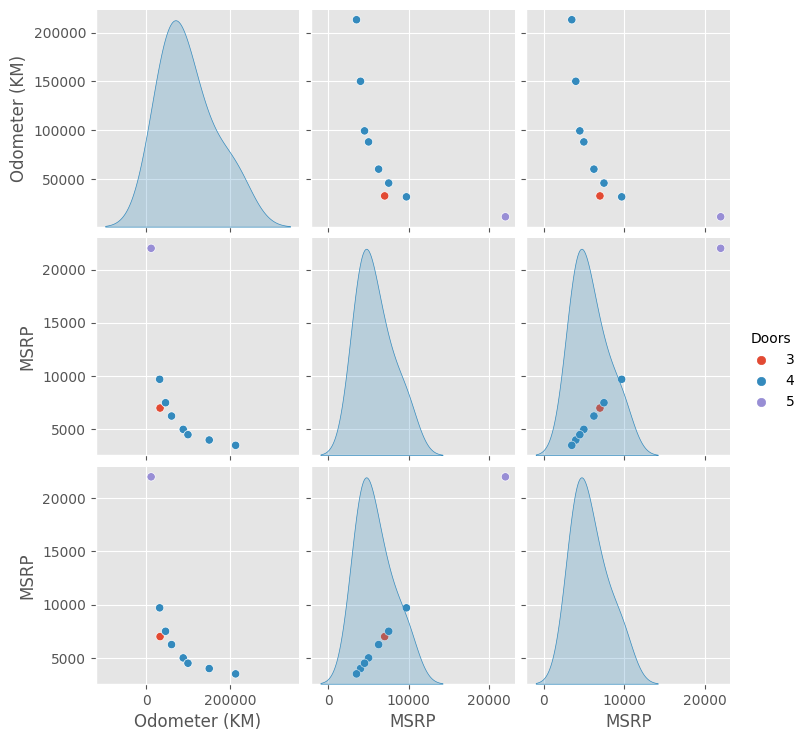

In [34]:
# Compare more than two features
sns.pairplot(data_frame_3, vars=['Odometer (KM)', 'MSRP', 'MSRP' ], hue = 'Doors')

<AxesSubplot:>

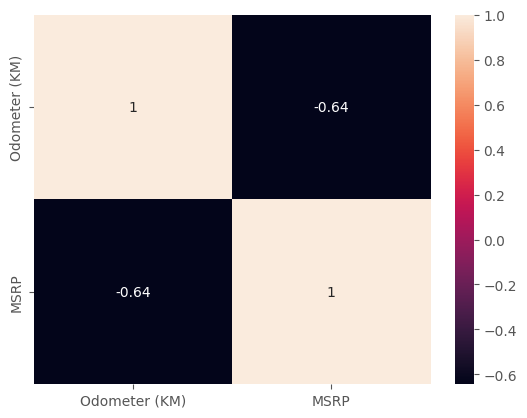

In [35]:
# Look at the Correlation.  Need to look only at numeric and will drop null values
data_frame_heat_map = data_frame_3[['Odometer (KM)', 'Doors', 'MSRP']].dropna().corr()
data_frame_heat_map
sns.heatmap(data_frame_heat_map, annot=True)

In [43]:
#Step 5 : Ask a Question abo the data
#Due value_counts() -- Might show you other ( Can Remove or Keep )
#Can use groupBy an can use the .agg(' ', 'count')
#data_frame_3
data_frame_3.groupby('Make').agg(['mean', 'count'])

Odometer (KM)           MSRP      
                mean count     mean count
Make                                     
BMW         11179.00     1  22000.0     1
Honda       66798.50     2   6250.0     2
Nissan     122347.50     2   6600.0     2
Toyota      85451.25     4   5437.5     4